In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import mpl_toolkits.axisartist.grid_finder as grid_finder
import mpl_toolkits.axisartist.angle_helper as angle_helper

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear

In [2]:
def setup_axes(fig, rect):
    """Polar projection, but in a rectangular box."""

    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi / 180.0, 1.0) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(
        20, 20, lon_cycle=360, lat_cycle=None,
        lon_minmax=None, lat_minmax=(0, np.inf),
    )

    grid_locator1 = angle_helper.LocatorDMS(12)
    grid_locator2 = grid_finder.MaxNLocator(5)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(
        tr, extreme_finder=extreme_finder, grid_locator1=grid_locator1,
        grid_locator2=grid_locator2, tick_formatter1=tick_formatter1
    )

    ax1 = fig.add_subplot(rect, axes_class=axisartist.Axes, grid_helper=grid_helper)
    ax1.axis[:].set_visible(False)
    ax1.set_aspect(1.0)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    return ax1

In [3]:
def add_floating_axis1(ax1):
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 30)
    axis.label.set_text(r"$\theta = 30^{\circ}$")
    axis.label.set_visible(True)

    return axis

In [4]:
def add_floating_axis2(ax1):
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")
    axis.label.set_visible(True)

    return axis

In [5]:
def ann(ax1, d):
    if plt.rcParams["text.usetex"]:
        d = d.replace("_", r"\_")

    ax1.annotate(
        d, (0.5, 1), (5, -5), va="top", ha="center",
        xycoords="axes fraction", textcoords="offset points",
    )

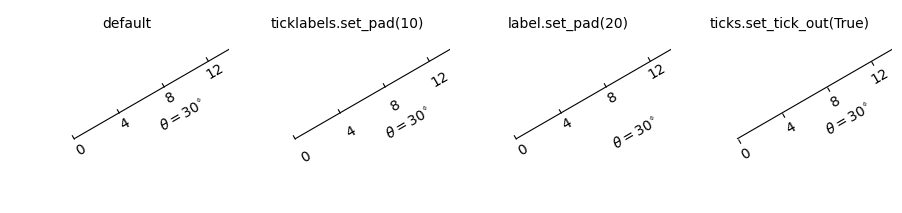

In [6]:
fig = plt.figure(figsize=(9, 3.))
fig.subplots_adjust(
    left=0.01, right=0.99, bottom=0.01, top=0.99,
    wspace=0.01, hspace=0.01,
)

ax1 = setup_axes(fig, rect=141)
axis = add_floating_axis1(ax1)
ann(ax1, r"default")

ax1 = setup_axes(fig, rect=142)
axis = add_floating_axis1(ax1)
axis.major_ticklabels.set_pad(10)
ann(ax1, r"ticklabels.set_pad(10)")

ax1 = setup_axes(fig, rect=143)
axis = add_floating_axis1(ax1)
axis.label.set_pad(20)
ann(ax1, r"label.set_pad(20)")

ax1 = setup_axes(fig, rect=144)
axis = add_floating_axis1(ax1)
axis.major_ticks.set_tick_out(True)
ann(ax1, "ticks.set_tick_out(True)")

plt.show()